# Programmer: Giovanni Vecchione
## Date: 3/8/24
## Subject: Project 3.1
Use convolutional neural network to build the project on the dataset of your choice. Submit your project as Jupyter notebook.

# Model 1.1

## Test 1:
Time: 21 min

    Training:
        Epoch 20/20
        1813/1813 [==============================] - 65s 36ms/step - loss: 0.2052 - accuracy: 0.9299 - val_loss: 0.2551 - val_accuracy: 0.9190
        
    Test:
        63/63 [==============================] - 1s 12ms/step - loss: 0.2551 - accuracy: 0.9190 Validation loss: 0.255, Validation accuracy: 0.919

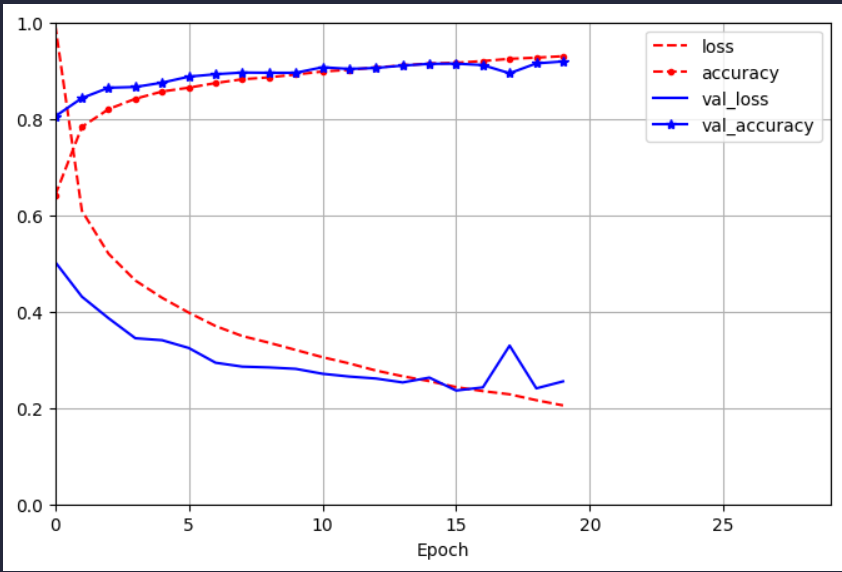

In [1]:
from functools import partial
import tensorflow as tf
import matplotlib as mpl

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-2000], y_train_full[:-2000]
X_valid, y_valid = X_train_full[-2000:], y_train_full[-2000:]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

tf.random.set_seed(42)


DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

model.summary()

model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])

#This portion stops training using early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[early_stopping])




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)       

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [ ]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_valid, y_valid)
print("Validation loss: {:.3f}, Validation accuracy: {:.3f}".format(val_loss, val_acc))

MODEL 1.2
Changes:
Added regularization layers

In [3]:
from functools import partial
import tensorflow as tf
import matplotlib as mpl

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-2000], y_train_full[:-2000]
X_valid, y_valid = X_train_full[-2000:], y_train_full[-2000:]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

tf.random.set_seed(42)


DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

model1 = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.L1(0.005)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.L1(0.005)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

model1.summary()

model1.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])

#This portion stops training using early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history1 = model1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 256)        

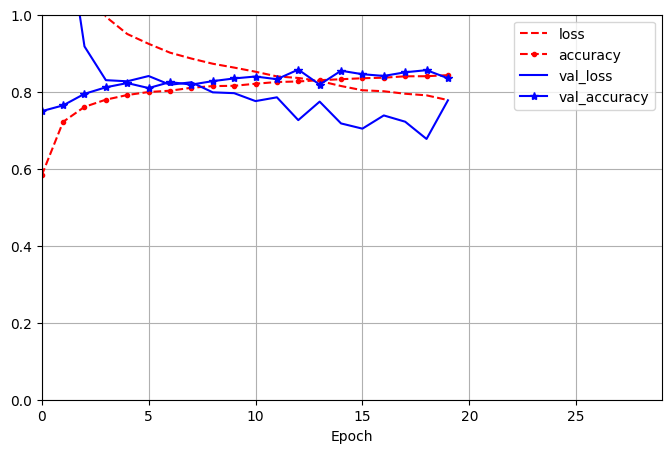

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history1.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [6]:
# Evaluate the model on the validation set
val_loss, val_acc = model1.evaluate(X_valid, y_valid)
print("Validation loss: {:.3f}, Validation accuracy: {:.3f}".format(val_loss, val_acc))

63/63 [==============================] - 1s 12ms/step - loss: 0.7777 - accuracy: 0.8350
Validation loss: 0.778, Validation accuracy: 0.835


Test:

Epoch 20/20
1813/1813 [==============================] - 68s 37ms/step - loss: 0.7783 - accuracy: 0.8431 - val_loss: 0.7777 - val_accuracy: 0.8350

validation:
63/63 [==============================] - 1s 12ms/step - loss: 0.7777 - accuracy: 0.8350
Validation loss: 0.778, Validation accuracy: 0.835

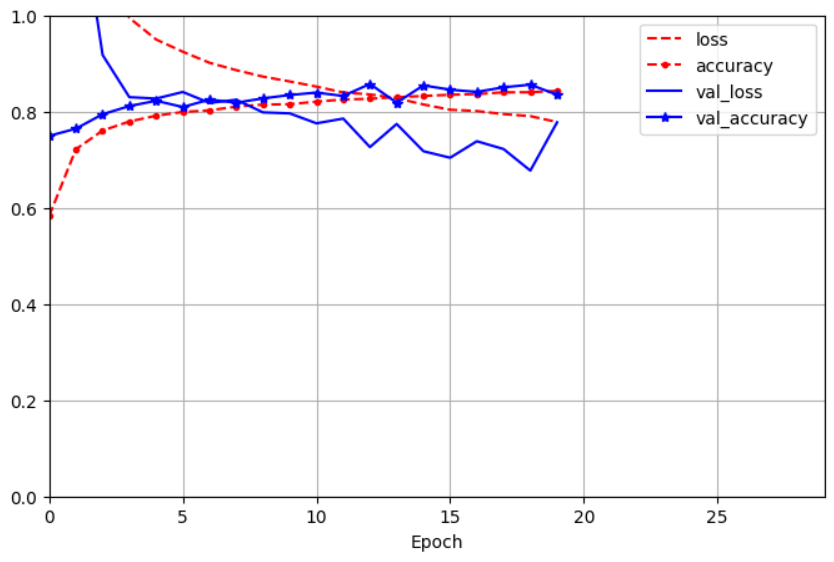

# Model 2
Building my own model seperate from the book but using the same fashion_mnist dataset.


In [8]:
from functools import partial
import tensorflow as tf
import matplotlib as mpl

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

X_train = tf.expand_dims(X_train, axis=-1)
X_valid = tf.expand_dims(X_valid, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax') 
])

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4586 - accuracy: 0.8336 - val_loss: 0.3490 - val_accuracy: 0.8714
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3060 - accuracy: 0.8879 - val_loss: 0.3067 - val_accuracy: 0.8822
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2610 - accuracy: 0.9042 - val_loss: 0.2670 - val_accuracy: 0.9056
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2268 - accuracy: 0.9163 - val_loss: 0.2456 - val_accuracy: 0.9088
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1982 - accuracy: 0.9257 - val_loss: 0.2401 - val_accuracy: 0.9136
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1772 - accuracy: 0.9335 - val_loss: 0.2288 - val_accuracy: 0.9192
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1545 - accuracy: 0.9418 - val_loss: 0.2372 - val_accuracy:

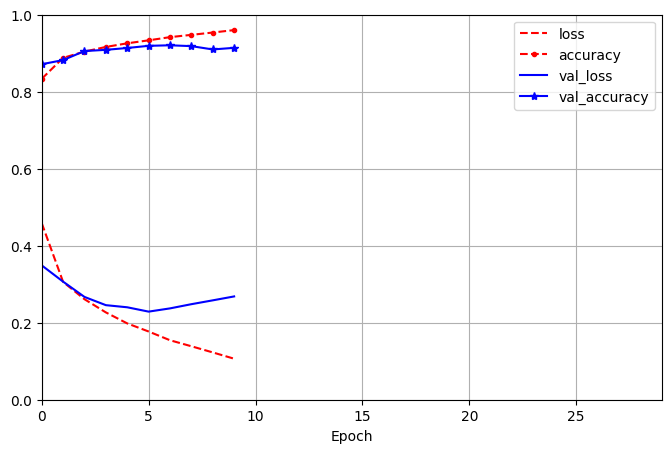

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history2.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [10]:
# Evaluate the model on the validation set
val_loss, val_acc = model2.evaluate(X_valid, y_valid)
print("Validation loss: {:.3f}, Validation accuracy: {:.3f}".format(val_loss, val_acc))

157/157 [==============================] - 0s 1ms/step - loss: 0.2683 - accuracy: 0.9140
Validation loss: 0.268, Validation accuracy: 0.914


## Training:
Epoch 10/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1065 - accuracy: 0.9601 - val_loss: 0.2683 - val_accuracy: 0.9140

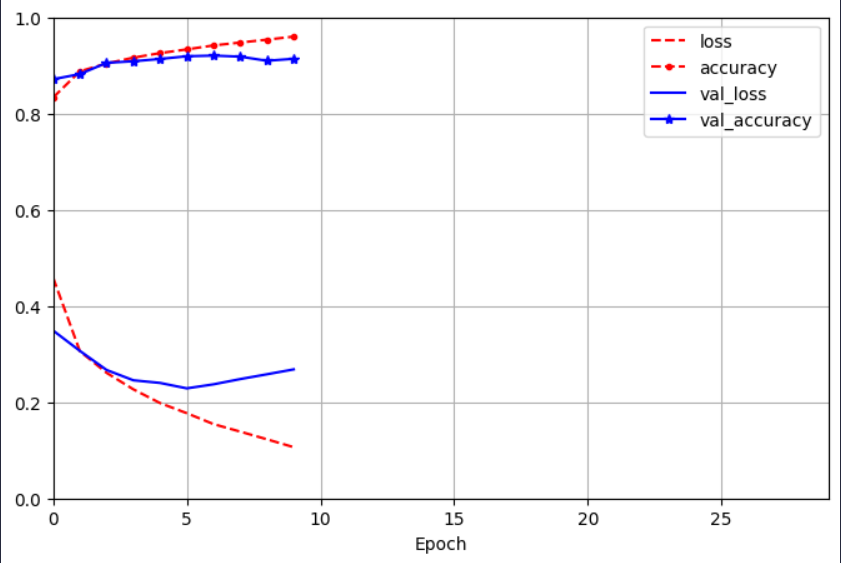

## Testing:
157/157 [==============================] - 0s 1ms/step - loss: 0.2683 - accuracy: 0.9140
Validation loss: 0.268, Validation accuracy: 0.914

### NOTES:

Clearly there is overfitting occuring however the potential for accuracy and loss is much better. Gonna work off this model.


To make the code more reusable, let's put together everything we have discussed so far into another helper function; it will create and return a dataset that will efficiently load California housing data from multiple CSV files, preprocess it, shuffle it, and batch it (see Figure 13-2):

def csv_reader_dataset(filepaths, n_readers=5, n_read_threads=None,
                       n_parse_threads=5, shuffle_buffer_size=10_000, seed=42,
                       batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths, seed=seed)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.shuffle(shuffle_buffer_size, seed=seed)
    return dataset.batch(batch_size).prefetch(1)
    
Note that we use the prefetch() method on the very last line. This is important for performance

In [ ]:
X_mean, X_std = [...]  # mean and scale of each feature in the training set
n_inputs = 8

def parse_csv_line(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    return tf.stack(fields[:-1]), tf.stack(fields[-1:])

def preprocess(line):
    x, y = parse_csv_line(line)
    return (x - X_mean) / X_std, y

In [ ]:
def csv_reader_dataset(filepaths, n_readers=5, n_read_threads=None,
                       n_parse_threads=5, shuffle_buffer_size=10_000, seed=42,
                       batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths, seed=seed)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.shuffle(shuffle_buffer_size, seed=seed)
    return dataset.batch(batch_size).prefetch(1)

# Model 3
## Dataset: Car images

Goal is to create a CNN that can identify the car brand

## Important: Ensure your 'train' and 'test' folders have the following structure:

train/
    car_type_1/
        image1.jpg
        image2.jpg
        ...
    car_type_2/
        ...
    ...
test/
    car_type_1/
        ...
    car_type_2/
        ...
    ...

In [56]:
import tensorflow as tf
import numpy as np
from functools import partial
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

seed = 42
random.seed(seed)


In [9]:
if torch.cuda.is_available():
    device = torch.device("cuda")  # Use the GPU
    print("Using GPU:", torch.cuda.get_device_name(0)) 
else:
    device = torch.device("cpu")  # Fallback to CPU
    print("GPU not available, using CPU.")

Using GPU: NVIDIA GeForce GTX 1660 SUPER


In [3]:
#This checks data set location and verifies if it's identified
import os
for file in os.listdir(r"D:\GioDude\Documents\ACC\Spring 2024\Machine Learning II\Datasets\vehicle_classification_kaggle" ):
    print(file)

test
train
val


# Preprocessing the Data:
Images need to have the csv so that it has the model with labels.

slice the file name dependent on the class names needed for regular files.

Changed dataset to a much more manageable source. However there is much less images so this could impede some training performance.

Orginally this was the code to reshuffle the data since it was data that was purely uncategorized:
#shuffle the dataset with a random seed
dataset_shuffled = dataset_images.shuffle(10000, seed=42)

Take only 5000 images from the shuffled dataset
dataset_subset = dataset_shuffled.take(5000)

Split the dataset into training, validation, and test datasets
train_size = 3000
val_size = 1000
test_size = 1000

train_ds = dataset_subset.take(train_size)
val_ds = dataset_subset.skip(train_size).take(val_size)
test_ds = dataset_subset.skip(train_size + val_size).take(test_size)


In [48]:
#Import Data by Path - Change this if location is different
dataset_path_train = r"D:\GioDude\Documents\ACC\Spring 2024\Machine Learning II\Datasets\vehicle_classification_kaggle\train"
dataset_path_val = r"D:\GioDude\Documents\ACC\Spring 2024\Machine Learning II\Datasets\vehicle_classification_kaggle\val"
dataset_path_test = r"D:\GioDude\Documents\ACC\Spring 2024\Machine Learning II\Datasets\vehicle_classification_kaggle\test"

#train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset_path_train)
#val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset_path_val)

Found 1400 files belonging to 10 classes.
Found 200 files belonging to 10 classes.


In [ ]:
# Set image size for resizing
IMG_SIZE = (224, 224)

# Create generators for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,  # Example augmentations
    width_shift_range=0.2,
    height_shift_range=0.2,
    # ... add other augmentations if needed
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [49]:
BATCH_SIZE = 10 #NOTE: batch size incompatable / batch size needs to split evenly with the size of the datasets otherwise you will have incorrect
#input sizes

train_ds = train_datagen.flow_from_directory(
    dataset_path_train,
    target_size=IMG_SIZE,
    batch_size=10,  # Choose any batch size now
    class_mode='categorical',  # Assuming multi-class
) 

val_ds = val_datagen.flow_from_directory(
    dataset_path_val,
    target_size=IMG_SIZE,
    batch_size=10, 
    class_mode='categorical' 
) 

# Resize the images and set batch size
#train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, IMG_SIZE), y)).batch(BATCH_SIZE)
#val_ds = val_ds.map(lambda x, y: (tf.image.resize(x, IMG_SIZE), y)).batch(BATCH_SIZE)

In [50]:
image, label = next(iter(train_ds))
print(image.shape, label.shape)

(10, 32, 224, 224, 3) (10, 32)


#Set data labels, seed, etc.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    labels='inferred',  # Labels are based on folder structure
    label_mode='categorical',  
    batch_size=BATCH_SIZE,
    seed=42,
    image_size=IMG_SIZE,
    subset = "training",
    validation_split = .2
)

#NOTE:Need to create a validation data set, however unsure how to do this
validation_datagen = ImageDataGenerator(rescale=1./255)  # Example with rescaling

valid_ds = validation_datagen.flow_from_directory(
    train_path,  # Same path as train_ds (validation split is internal)
    labels = 'inferred',
    label_mode = 'categorical',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=42,
    subset='validation',
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode='categorical',  
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed=42,
)

#Import Data by Path - Change this if location is different
train_path = r"D:\GioDude\Documents\ACC\Spring 2024\Machine Learning II\Datasets\kaggle_various_car_images\Cars Dataset\train" 
test_path = r"D:\GioDude\Documents\ACC\Spring 2024\Machine Learning II\Datasets\kaggle_various_car_images\Cars Dataset\test"  

train_set = csv_reader_dataset(train_path)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_path)

In [51]:

model3 = tf.keras.Sequential([
     tf.keras.layers.Conv2D(32, (3, 3), padding ='same', activation='relu', input_shape= (224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer="he_normal"), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(10, activation='softmax') 
])

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model3.summary()

c:\Users\GioDude\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_65 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 110, 110, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 108, 108, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │    10,240,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_13                │ (None, 64)             │           129 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,526,923 (40.16 MB)

 Trainable params: 10,526,794 (40.16 MB)

 Non-trainable params: 129 (520.00 B)

In [54]:
history3 = model3.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, None, 224, 224, 3), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (None, None, 224, 224, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, None, 224, 224, 3), dtype=float32)
  • training=True
  • mask=None

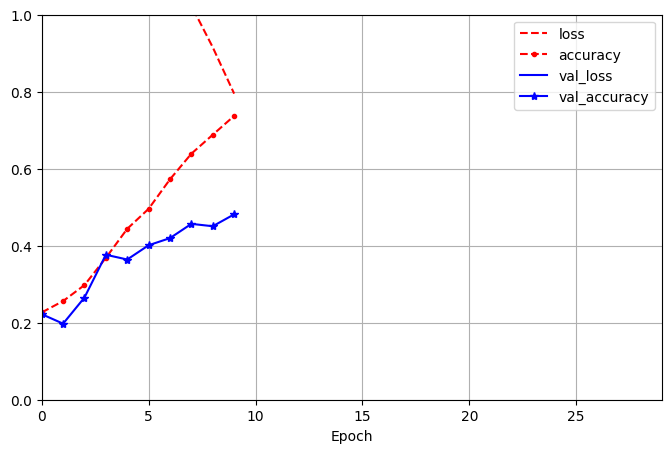

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history3.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [ ]:
# Evaluate the model on the validation set
val_loss, val_acc = model3.evaluate(X_valid, y_valid)
print("Validation loss: {:.3f}, Validation accuracy: {:.3f}".format(val_loss, val_acc))

Model 2 Testing:

Test 1: 
Overfitting, changing the dense layers to decrease complexity.

Results: This stopped the overfitting, however the model is performing poorly in both valid and training. However this is a step in the right direction from overfitting.

Test 2:
Adding layers to see if this helps with complexity. Adjusted filters also from 32,64 to 32,64,64,128,128

...
tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
...